<a href="https://colab.research.google.com/github/FGalvao77/-DICAS-Uso-de-ferramentas-para-Data-Science-e-afins/blob/main/%5BDICAS%5D_Aplica%C3%A7%C3%A3o_de_escalonamento_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **[DICAS] - Aplicação de escalonamento de dados**
---

A aplicação de _escalonamento de dados_ antes de usar o `GridSearchCV` pode levar o vazamento de dados, já que o re-dimensionamento informa algumas informações sobre os dados.

Para evitar isso, primeiro monte os modelos _scaler_ e de _machine learning_ em um `pipeline` e, em seguida, use-o como estimador para `GridSearchCV`.

In [1]:
# importando as funções/módulos
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import  StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [2]:
# criando o objeto pipeline
make_pipe = make_pipeline(
    StandardScaler(), SVC()
)

# visualizando o objeto
make_pipe

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [3]:
# definindo os parâmetros do "grid"
grid_params = {
    'svc__C': [0.1, 1, 10, 100, 1_000],
    'svc__gamma': [0.1, 1, 10, 100]
}

# visualizando os parâmetros do objeto
grid_params

{'svc__C': [0.1, 1, 10, 100, 1000], 'svc__gamma': [0.1, 1, 10, 100]}

In [4]:
# criando o objeto "hipertunado"
grid = GridSearchCV(
    make_pipe, grid_params, cv=5, n_jobs=-1
)

# visualizando o objeto
grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10, 100, 1000],
                         'svc__gamma': [0.1, 1, 10, 100]})

In [5]:
# visualizando os parâmetros do "grid"
grid.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__memory', 'estimator__steps', 'estimator__verbose', 'estimator__standardscaler', 'estimator__svc', 'estimator__standardscaler__copy', 'estimator__standardscaler__with_mean', 'estimator__standardscaler__with_std', 'estimator__svc__C', 'estimator__svc__break_ties', 'estimator__svc__cache_size', 'estimator__svc__class_weight', 'estimator__svc__coef0', 'estimator__svc__decision_function_shape', 'estimator__svc__degree', 'estimator__svc__gamma', 'estimator__svc__kernel', 'estimator__svc__max_iter', 'estimator__svc__probability', 'estimator__svc__random_state', 'estimator__svc__shrinking', 'estimator__svc__tol', 'estimator__svc__verbose', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [6]:
# importando o conjunto de dados
from sklearn.datasets import load_breast_cancer

In [7]:
# instanciando o conjunto de dados
breast_cancer = load_breast_cancer()

# visualizando a descrição do conjunto de dados
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [8]:
# importando as demais bibliotecas 
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [9]:
# breast_cancer

In [10]:
# criando um "data frame" com os dados
df = pd.DataFrame(
    data=breast_cancer.data, 
    columns=[breast_cancer.feature_names]
)

# visualizando 5 primeiras observações
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
# instanciando os dados de classificação no df
df['class'] = breast_cancer.target

# visualizando 5 primeiras observações da coluna "class"
df['class'].head()

,class
0,0
1,0
2,0
3,0
4,0


In [12]:
# visualizando a quantidade de colunas e o nome de cada uma
len(df.columns), df.columns

(31, MultiIndex([(            'mean radius',),
             (           'mean texture',),
             (         'mean perimeter',),
             (              'mean area',),
             (        'mean smoothness',),
             (       'mean compactness',),
             (         'mean concavity',),
             (    'mean concave points',),
             (          'mean symmetry',),
             ( 'mean fractal dimension',),
             (           'radius error',),
             (          'texture error',),
             (        'perimeter error',),
             (             'area error',),
             (       'smoothness error',),
             (      'compactness error',),
             (        'concavity error',),
             (   'concave points error',),
             (         'symmetry error',),
             ('fractal dimension error',),
             (           'worst radius',),
             (          'worst texture',),
             (        'worst perimeter',),
       

In [13]:
# instanciando as variáveis explicativas (X)
X = df.iloc[:, :-1]
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [14]:
# instanciando a variável resposta (y)
y = df['class']
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [15]:
# importando função/módulo para realizar o particionamento dos dados
from sklearn.model_selection import train_test_split as tts

In [16]:
# particionando os dados (X e y) em treino e teste
X_train, X_test, y_train, y_test = tts(
    X, y, test_size=0.3, random_state=42
)

In [17]:
# realizando o treinamento do modelo
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10, 100, 1000],
                         'svc__gamma': [0.1, 1, 10, 100]})

In [18]:
# visualizando o melhor parâmetro 
grid.best_params_

{'svc__C': 1, 'svc__gamma': 0.1}

In [19]:
# realizando a predição com o modelo
y_pred = grid.predict(X_test)
y_pred[:10]

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [20]:
# importando funções/módulos para avaliação do modelo
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [21]:
# visualizando o "report" do modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        63
           1       0.98      0.95      0.97       108

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [22]:
# visualizando a matriz de confusão
print(confusion_matrix(y_test, y_pred))

[[ 61   2]
 [  5 103]]


In [23]:
# importando biblioteca para visualização gráfica
import matplotlib.pyplot as plt
%matplotlib inline

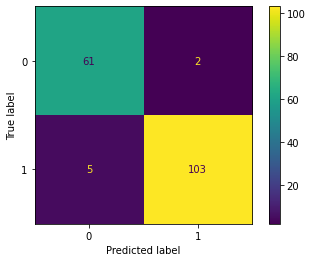

In [24]:
# plotando a matriz de confusão
plot_confusion_matrix(grid, X_test, y_test)
plt.show();

**BÔNUS**

Vamos utilizar a biblioteca [Yellowbrick](https://www.scikit-yb.org/en/latest/index.html) para visualização de dados.

_Yellowbrick_ estende a **API** `Scikit-Learn` para facilitar a seleção de modelos e o ajuste de hiperparâmetros. Sob a interface, onde _"por dos panos"_  está usando o Matplotlib.

Instalando a biblioteca.

In [25]:
!pip install yellowbrick -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Classification Report**

O _Classification Report_ (visualizador do relatório de classificação) exibe as pontuações de precisão, recuperação, F1 e suporte para o modelo. Para facilitar a interpretação e a detecção de problemas, o relatório integra pontuações numéricas com um mapa de calor codificado por cores. Todos os mapas de calor estão no intervalo (0,0, 1,0) para facilitar a comparação de modelos de classificação em diferentes relatórios de classificação.

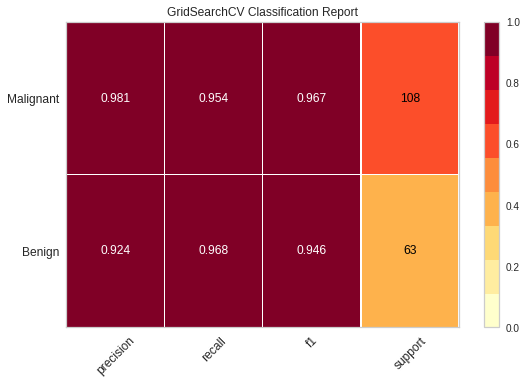

In [26]:
# importando a função/módulo para gerar o "report" gráfico da análise
from yellowbrick.classifier import ClassificationReport

# especificando as classes 
classes = ['Benign', 'Malignant']

# definindo o objeto, onde passamos os seguintes parâmetros:
# modelo, classes, suporte
visualizer = ClassificationReport(grid, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # treinando o objeto (modelo gráfico)
visualizer.score(X_test, y_test)        # avalinado o modelo nos dados de teste
visualizer.show();                      # exibindo o resultado final do modelo

**Confusion Matrix**

O visualizador _ConfusionMatrix_ (Matriz de confusão) é um `ScoreVisualizer` (Visualizador de pontuação) que usa um classificador **scikit-learn** ajustado e um conjunto de valores de teste `X` e `y` e retorna um relatório mostrando como cada uma das classes previstas de valores de teste se compara às suas classes reais. 

Os cientistas de dados usam matrizes de confusão para entender quais classes são mais facilmente _confundidas_. Eles fornecem informações semelhantes às disponíveis em um **ClassificationReport**, mas, em vez de pontuações de nível superior, fornecem informações mais detalhadas sobre a classificação de pontos de dados individuais.

Abaixo segue um exemplo do uso do visualizador ConfusionMatrix; mais informações podem ser encontradas consultando a documentação do scikit-learn sobre matrizes de confusão.

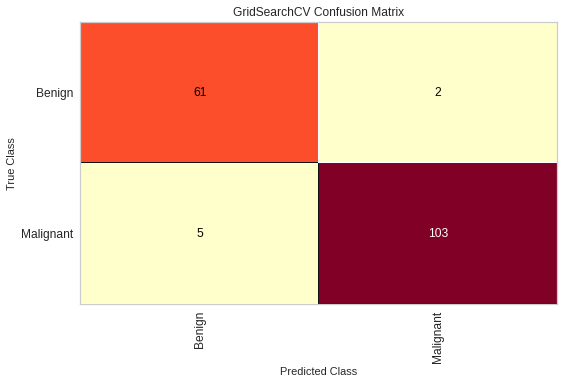

In [27]:
from yellowbrick.classifier import ConfusionMatrix

classes = ['Benign', 'Malignant']

viz = ConfusionMatrix(grid, classes=classes)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

**ROCAUC**

Um gráfico ROCAUC (do inglês, Receiver Operating Characteristic/Area Under the Curve) (Características operacionais do receptor/Área sob a curva) permite ao usuário visualizar a compensação entre a sensibilidade e a especificidade do classificador.

A _Receiver Operating Characteristic` (ROC) é uma medida da qualidade preditiva de um classificador que compara e visualiza a compensação entre a sensibilidade e a especificidade do modelo. Quando plotada, uma curva ROC exibe a taxa de verdadeiros positivos no eixo Y e a taxa de falsos positivos no eixo X em uma média global e por classe.O ponto ideal é, portanto, o canto superior esquerdo do gráfico: os falsos positivos são zero e os verdadeiros positivos são um.

Isso leva a outra métrica, área sob a curva (AUC), que é um cálculo da relação entre falsos positivos e verdadeiros positivos.Quanto maior a AUC, melhor o modelo geralmente é. No entanto, também é importante inspecionar a “inclinação” da curva, pois isso descreve a maximização da taxa de verdadeiros positivos enquanto minimiza a taxa de falsos positivos.

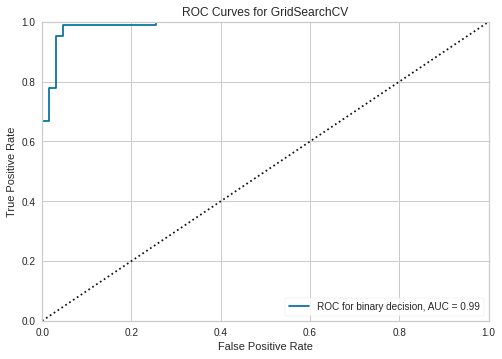

In [28]:
from yellowbrick.classifier.rocauc import ROCAUC

visualizer = ROCAUC(grid, classes=['Benign', 'Malignant'], binary=True)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();                      # Finalize and show the figure

**Método rápido**

A mesma funcionalidade acima pode ser obtida com o método rápido associado roc_auc. Este método irá construir o objeto ROCAUC com os argumentos associados, ajustá-lo, então (opcionalmente) mostrá-lo imediatamente.

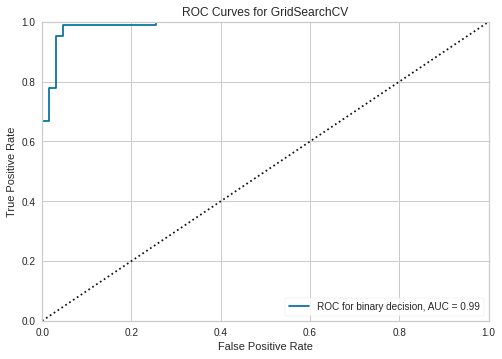

In [29]:
from yellowbrick.classifier.rocauc import roc_auc

roc_auc(grid, X_train, y_train, X_test=X_test, y_test=y_test, 
        classes=['Benign', 'Malignant'], binary=True)
plt.show()

**Precision-Recall Curves**

O PrecisionRecallCurve (Curvas de Recuperação de Precisão) mostra a compensação entre a precisão de um classificador, uma medida de relevância do resultado, e o recall, uma medida de completude. Para cada classe, a precisão é definida como a razão de verdadeiros positivos para a soma de verdadeiros e falsos positivos, e recall é a razão de verdadeiros positivos para a soma de verdadeiros positivos e falsos negativos.

- **precision**

 - _Precision_ pode ser vista como uma medida da exatidão de um classificador. Para cada classe, é definido como a razão de verdadeiros positivos para a soma de verdadeiros e falsos positivos. Dito de outra forma, “para todas as instâncias classificadas como positivas, qual porcentagem estava correta?”

- **recall**
 - _Recall_ é uma medida da completude do classificador; a capacidade de um classificador para encontrar corretamente todas as instâncias positivas. Para cada classe, é definida como a razão de verdadeiros positivos para a soma de verdadeiros positivos e falsos negativos. Dito de outra forma, “para todas as instâncias que foram realmente positivas, qual porcentagem foi classificada corretamente?”

- **average precision**
 - _Average precision_ expressa a curva de precisão-recall em um único número, que representa a área sob a curva. Ele é calculado como a média ponderada de precisão alcançada em cada limiar, onde os pesos são as diferenças de rechamada dos limiares anteriores.


Tanto a `precision` quanto o `recall` variam entre 0 e 1 e, em nossos esforços para selecionar e ajustar os modelos de aprendizado de máquina, nosso objetivo geralmente é tentar maximizar a precisão e o recall, ou seja, um modelo que retorna resultados precisos para a maioria das classes que seleciona. Isso resultaria em uma visualização PrecisionRecallCurve com uma área alta sob a curva.

**Classificação Binária**

O caso base para curvas de recuperação de precisão é o caso de classificação binária, e este caso também é o mais visualmente interpretável. Na figura abaixo, podemos ver a precisão plotada no eixo y em relação ao recall no eixo x. Quanto maior a área preenchida, mais forte o classificador. A linha vermelha anota a precisão média.

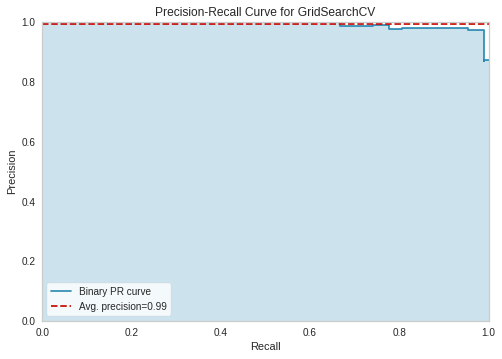

In [30]:
from yellowbrick.classifier import PrecisionRecallCurve

# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(
    grid
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

**Classificação de vários rótulos**

Para dar suporte à classificação multirrótulo, o estimador é encapsulado em um OneVsRestClassifier para produzir comparações binárias para cada classe (por exemplo, o caso positivo é a classe e o caso negativo é qualquer outra classe). A curva de precisão-recall pode então ser calculada como a micromédia da precisão e recall para todas as classes (definindo micro=True), ou curvas individuais podem ser plotadas para cada classe (definindo per_class=True):

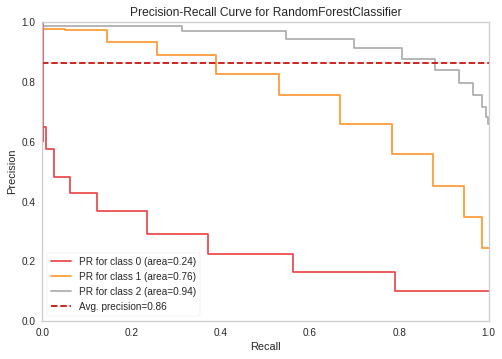

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.datasets import load_game

# Load dataset and encode categorical variables
X, y = load_game()
X = OrdinalEncoder().fit_transform(X)
y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, shuffle=True)

# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(
    RandomForestClassifier(n_estimators=10),
    per_class=True,
    cmap='Set1'
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

**Erro de previsão de classe**

O gráfico Yellowbrick ClassPredictionError é uma "reviravolta" em outras ferramentas de diagnóstico de modelo de classificação, às vezes mais familiares, como a Matriz de Confusão e o Relatório de Classificação. Assim como o Relatório de Classificação, este gráfico mostra o suporte (número de amostras de treinamento) para cada classe no modelo de classificação ajustado como um gráfico de barras empilhadas. 

Cada barra é segmentada para mostrar a proporção de previsões (incluindo falsos negativos e falsos positivos, como uma Matriz de Confusão) para cada classe. Você pode usar um ClassPredictionError para visualizar com quais classes seu classificador está tendo dificuldades particularmente e, mais importante, quais respostas incorretas ele está dando por classe. Isso geralmente permite que você entenda melhor os pontos fortes e fracos de diferentes modelos e desafios específicos exclusivos do seu conjunto de dados.

O gráfico de erro de previsão de classe fornece uma maneira de entender rapidamente como seu classificador é bom em prever as classes certas.

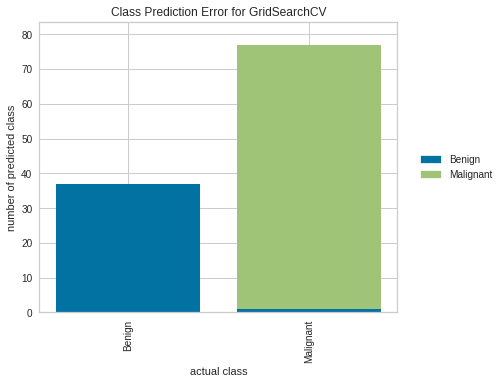

In [32]:
from sklearn.datasets import load_breast_cancer
from yellowbrick.classifier import class_prediction_error

# Load the dataset and split into train/test splits
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = tts(
    X, y, test_size=0.2, shuffle=True
)

class_prediction_error(
    grid,
    X_train, y_train, X_test, y_test,
    classes=['Benign', 'Malignant']
);